In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

import warnings
warnings.filterwarnings(action="ignore")
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# Modelimizi oluşturalım:
y1 = house_prices_df["SalePrice"]
x1 = house_prices_df[["OverallQual","YearBuilt","TotalBsmtSF","GrLivArea","FullBath","GarageCars","GarageArea", "TotRmsAbvGrd"]]

# Verilerimizi "test" ve "eğitim" olarak ikiye bölelim:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)    
print(f"Eğitim kümesindeki gözlem sayısı : {x1_train.shape[0]}")
print(f"Test kümesindeki gözlem sayısı   : {x1_test.shape[0]}")

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [3]:
# Eğitim verilerinin performansı
x1_train = sm.add_constant(x1_train)

results1_model = sm.OLS(y1_train, x1_train)
results1 = results1_model.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     457.1
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:23:06   Log-Likelihood:                -13971.
No. Observations:                1168   AIC:                         2.796e+04
Df Residuals:                    1159   BIC:                         2.801e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.602e+05      1e+05     -7.604      0.000   -9.56e+05   -5.64e+05
OverallQual   2.057e+04   1275.655     16.126      0.000    1.81e+04    2.31e+04
YearBuilt      350.6330     52.438      6.687      0.000     247.750     453.516
TotalBsmtSF     23.7655      3.236      7.344      0.000      17.416      30.115
GrLivArea       50.6658      4.636     10.930      0.000      41.571      59.761
FullBath     -5133.3237   2995.572     -1.714      0.087    -1.1e+04     744.027
GarageCars    1.178e+04   3439.988      3.425      0.001    5031.440    1.85e+04
GarageArea      14.9849     11.743      1.276      0.202      -8.056      38.025
TotRmsAbvGrd   302.8780   1250.374      0.242      0.809   -2150.372    2756.128
==============================================================================
Omnibus:                      426.978   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37422.166
Skew:                          -0.730   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     2.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
# Test verilerinin performansı
x1_test = sm.add_constant(x1_test)
y1_predict = results1.predict(x1_test)

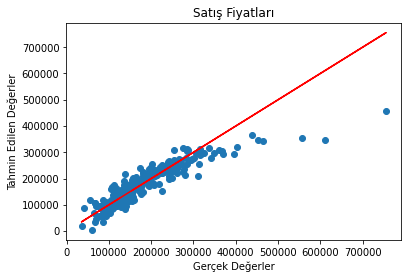

In [5]:
plt.scatter(y1_test, y1_predict)
plt.plot(y1_test, y1_test, color = "red")
plt.title("Satış Fiyatları")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")

plt.show()

In [6]:
mae1 = mean_absolute_error(y1_test, y1_predict)
mse1 = mse(y1_test, y1_predict)
rmse1 = rmse(y1_test, y1_predict)
mape1 = (abs((y1_test - y1_predict)) / y1_test).mean() * 100

print(f"Ortalama Mutlak Hata (MAE)        : {mae1:.2f}")
print(f"Ortalama Kare Hata (MSE)          : {mse1:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE)     : {rmse1:.2f}")
print(f"Ortalama Mutlak Yüzde Hata (MAPE) : %{mape1:.2f}")

Ortalama Mutlak Hata (MAE)        : 25118.46
Ortalama Kare Hata (MSE)          : 1573070778.97
Kök Ortalama Kare Hata (RMSE)     : 39661.96
Ortalama Mutlak Yüzde Hata (MAPE) : %15.16


## Model 2
ExterQual, BsmtQual ve GarageQual kategorik değişkenleri numerik değerlere dönüştürüldü ve eklendi; 1. kat, 2. kat ve bodrum alanları toplandı, TotalSF (Toplam Alan) değişkeni oluşturuldu ve eklendi.

In [7]:
house_prices_df.ExterQual = house_prices_df.ExterQual.replace({"Ex":4, "Gd":3, "TA":2, "Fa":1, "Po":0})
house_prices_df.BsmtQual = house_prices_df.BsmtQual.replace({"Ex":4, "Gd":3, "TA":2, "Fa":1, np.nan:0})
house_prices_df.GarageQual = house_prices_df.GarageQual.replace({"Ex":4, "Gd":3, "TA":2, "Fa":1, np.nan:0, "Po":0})

house_prices_df["TotalSF"] = house_prices_df["TotalBsmtSF"] + house_prices_df["1stFlrSF"] + house_prices_df["2ndFlrSF"]

x1 = house_prices_df[["OverallQual","YearBuilt","TotalBsmtSF","GrLivArea","FullBath","GarageCars","GarageArea", "TotRmsAbvGrd"]]

# Tüm verilerle modelin açıklanması
y2 = y1
x2 = house_prices_df[["TotalSF", "ExterQual","BsmtQual","GarageQual","OverallQual", "GrLivArea","YearBuilt","TotalBsmtSF","GrLivArea","FullBath","GarageCars","TotalSF"]]

In [8]:
# Modelimizi "test" ve "eğitim" verileri olarak ikiye bölelim.
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

print(f"Eğitim kümesindeki gözlem sayısı : {x2_train.shape[0]}")
print(f"Test kümesindeki gözlem sayısı   : {x2_test.shape[0]}")


Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [9]:
# Eğitim setimizin performansı
x2_train = sm.add_constant(x2_train)

results2_model = sm.OLS(y2_train, x2_train)
results2 = results2_model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     390.5
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:23:06   Log-Likelihood:                -13941.
No. Observations:                1168   AIC:                         2.790e+04
Df Residuals:                    1157   BIC:                         2.796e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.523e+05   1.07e+05     -4.244      0.000   -6.61e+05   -2.43e+05
TotalSF        13.3958     11.774      1.138      0.255      -9.704      36.496
ExterQual     1.75e+04   2887.270      6.061      0.000    1.18e+04    2.32e+04
BsmtQual     9024.1782   2175.278      4.149      0.000    4756.247    1.33e+04
GarageQual  -3042.1786   2591.951     -1.174      0.241   -8127.630    2043.273
OverallQual  1.521e+04   1421.410     10.698      0.000    1.24e+04     1.8e+04
GrLivArea      13.1677     11.616      1.134      0.257      -9.623      35.958
YearBuilt     184.6472     56.539      3.266      0.001      73.716     295.578
TotalBsmtSF    -8.0360     23.956     -0.335      0.737     -55.037      38.965
GrLivArea      13.1677     11.616      1.134      0.257      -9.623      35.958
FullBath    -7214.9809   2905.423     -2.483      0.013   -1.29e+04   -1514.493
GarageCars   1.589e+04   2276.563      6.982      0.000    1.14e+04    2.04e+04
TotalSF        13.3958     11.774      1.138      0.255      -9.704      36.496
==============================================================================
Omnibus:                      432.882   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38542.850
Skew:                          -0.751   Prob(JB):                         0.00
Kurtosis:                      31.102   Cond. No.                     1.10e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.36e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

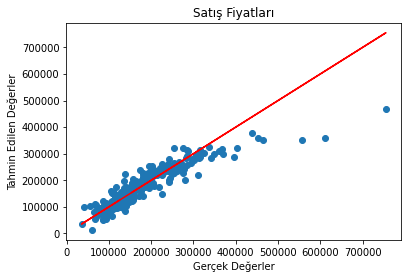

In [10]:
# Test verilerimizin performansı
x2_test = sm.add_constant(x2_test)
y2_predict = results2.predict(x2_test)

plt.scatter(y2_test, y2_predict)
plt.plot(y2_test, y2_test, color = "red")
plt.title("Satış Fiyatları")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")

plt.show()

In [11]:
mae2 = mean_absolute_error(y2_test, y2_predict)
mse2 = mse(y2_test, y2_predict)
rmse2 = rmse(y2_test, y2_predict)
mape2 = (abs((y2_test - y2_predict)) / y2_test).mean() * 100

print(f"Ortalama Mutlak Hata (MAE)        : {mae2:.2f}")
print(f"Ortalama Kare Hata (MSE)          : {mse2:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE)     : {rmse2:.2f}")
print(f"Ortalama Mutlak Yüzde Hata (MAPE) : %{mape2:.2f}")

Ortalama Mutlak Hata (MAE)        : 24612.30
Ortalama Kare Hata (MSE)          : 1495097800.88
Kök Ortalama Kare Hata (RMSE)     : 38666.49
Ortalama Mutlak Yüzde Hata (MAPE) : %14.65


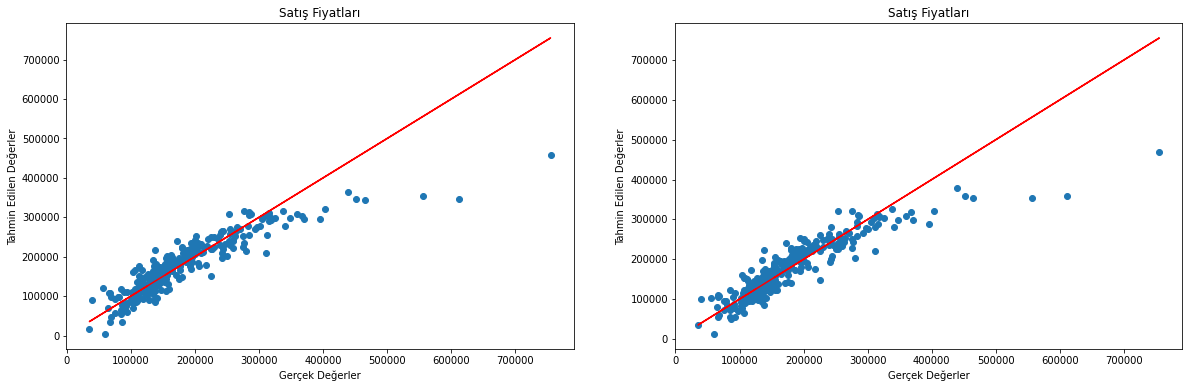

In [12]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.scatter(y1_test, y1_predict)
plt.plot(y1_test, y1_test, color = "red")
plt.title("Satış Fiyatları")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")

plt.subplot(122)
plt.scatter(y2_test, y2_predict)
plt.plot(y2_test, y2_test, color = "red")
plt.title("Satış Fiyatları")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")

plt.show()

## Yorumlar:
### Model 1:
$ R^2$ değeri : 0.759
### Model 2:
$ R^2$ değeri : 0.771

In [13]:
print("Model 2'nin, Model 1'den:")
print(f"Ortalama Mutlak Hata (MAE) Farkı        : %{100 * (mae2-mae1)/mae1:.2f}")
print(f"Ortalama Kare Hata (MSE) Farkı          : %{100 * (mse2-mse1)/mse1:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE) Farkı     : %{100 * (rmse2-rmse1)/rmse1:.2f}")
print(f"Ortalama Mutlak Yüzde Hata (MAPE) Farkı : %{100 * (mape2-mape1)/mape1:.2f}")

Model 2'nin, Model 1'den:
Ortalama Mutlak Hata (MAE) Farkı        : %-2.02
Ortalama Kare Hata (MSE) Farkı          : %-4.96
Kök Ortalama Kare Hata (RMSE) Farkı     : %-2.51
Ortalama Mutlak Yüzde Hata (MAPE) Farkı : %-3.36


## Sonuç:
Model 1'in eğitim seti, tek başına yeterince başarılı bir sonuç ortaya koymakta, "Satış Fiyatı" varyansının %75.9'sını açıklamaktadır fakat %77.1'lık bir oranla Model 2'nin başarısı daha yüksektir. Ayrıca, $R^2$, AIC & BIC değerlerini dikkate aldığımızda, Model 2 yine başarısını ortaya koymaktadır.

Her iki model de, düşük "Satış Fiyatı" değerlerinde, yüksek değerlerden daha iyi tahminler sergilemektedir. Veriler, çizginin düşük değerleri etrafında daha sık toplanmaktadır.
